In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Omics_EPCG = pd.read_csv('OmicsExpressionProteinCodingGenesTPMLogp1.csv')
Omics_EPCG = Omics_EPCG.rename(columns={'Unnamed: 0': 'Depmap ID'})

DRC_table = pd.read_excel('DRCtableAUC_merge_DepmapID_preprocess_v3.xlsx')

Crispr_gene = pd.read_csv('CRISPRGeneDependency.csv')



In [3]:
Omics_mut = pd.read_excel('Sum_SomaticMutations.xlsx')

In [4]:
Omics_mut.head()

,HugoSymbol,Cell names_WT,Cell names_MT
0,EIF4EBP2,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","LOVO, OVK18, MCF7"
1,TP53,"HS294T, 5637, PANC0327, C8166, MELJUSO, HEYA8,...","RERFLCMS, 22RV1, 22RV1, SW900, LK2, NUGC3, IGR..."
2,MAP3K4,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","22RV1, ONS76, JHH1, LS180, MFE296, MFE319, SNU..."
3,MAGEE1,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","IGROV1, SNUC2A, HT115, GP2D, GP2D, MCF7, JHUEM..."
4,C1orf50,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","NCIH838, HCT15, MELJUSO"


In [5]:
Omics_mut = Omics_mut.rename(columns={'HugoSymbol': 'Gene'})

In [6]:
Omics_mut['Gene'] = Omics_mut['Gene'] + "_mutational status"
Omics_mut.head()

,Gene,Cell names_WT,Cell names_MT
0,EIF4EBP2_mutational status,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","LOVO, OVK18, MCF7"
1,TP53_mutational status,"HS294T, 5637, PANC0327, C8166, MELJUSO, HEYA8,...","RERFLCMS, 22RV1, 22RV1, SW900, LK2, NUGC3, IGR..."
2,MAP3K4_mutational status,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","22RV1, ONS76, JHH1, LS180, MFE296, MFE319, SNU..."
3,MAGEE1_mutational status,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","IGROV1, SNUC2A, HT115, GP2D, GP2D, MCF7, JHUEM..."
4,C1orf50_mutational status,"HS294T, NCIH446, PANC0327, HARA, HS683, ECC10,...","NCIH838, HCT15, MELJUSO"


In [7]:
categorical_features = Omics_mut['Gene'].tolist()

In [8]:
df2 = Omics_mut
df1 = DRC_table

In [9]:
# Create a dictionary to hold the new columns
new_columns = {}

# For each gene in df2, create a corresponding column in the dictionary
for index, row in df2.iterrows():
    gene = row['Gene']
    wt_cells = set(row['Cell names_WT'].split(', '))
    mt_cells = set(row['Cell names_MT'].split(', '))
    
    # Apply the check to each cell name in df1
    new_columns[gene] = df1['Cell name'].apply(lambda x: False if x in wt_cells else (True if x in mt_cells else None))

# Convert the dictionary into a DataFrame
new_df = pd.DataFrame(new_columns)

# Concatenate new_df to df1 (along columns)
df1 = pd.concat([df1, new_df], axis=1)


In [10]:
# For each gene in df2, create a corresponding column in df1
#for index, row in df2.iterrows():
 #   gene = row['Gene']
  #  wt_cells = set(row['Cell names_WT'].split(', '))
   # mt_cells = set(row['Cell names_MT'].split(', '))
    
    # Apply the check to each cell name in df1
    #df1[gene] = df1['Cell name'].apply(lambda x: False if x in wt_cells else (True if x in mt_cells else None))

In [11]:
df1.head()

,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,...,GC_mutational status,IGKV1-6_mutational status,SEPTIN4_mutational status,ITGA7_mutational status,SCGB2A2_mutational status,LAMB2_mutational status,ORC4_mutational status,TCHP_mutational status,PLK2_mutational status,TRIM69_mutational status
0,BEN,ACH-000603,1.0,1.0,insensitive,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,BXPC3,ACH-000535,1.0,1.0,insensitive,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,EOL1,ACH-000198,1.0,1.0,insensitive,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,HA1E,ACH-001310,1.0,1.0,insensitive,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,HCC1438,ACH-000891,1.0,1.0,insensitive,0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [12]:

df1.fillna(False, inplace=True)

In [13]:
Omics_EPCG.head()

,Depmap ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
0,ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
4,ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [14]:
Omics = Omics_EPCG.transpose()
Omics = Omics.reset_index()


row_index = 0
# Set the new header
new_header = Omics.iloc[row_index]  # Take the row to be used as header
df = Omics[1:]  # Remove the header row from the data
df.columns = new_header  # Set new header

# Reset index if desired
df.reset_index(drop=True, inplace=True)
df.head()

,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105),4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102),0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813),7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147),2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732),4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [15]:
df['Depmap ID'] = df['Depmap ID'] + "_Expression"

C:\Users\Mark Leon-Duque\AppData\Local\Temp\ipykernel_13400\684804210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depmap ID'] = df['Depmap ID'] + "_Expression"


In [16]:
df.head()

,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105)_Expression,4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102)_Expression,0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813)_Expression,7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147)_Expression,2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732)_Expression,4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [17]:
expression_features = df['Depmap ID'].tolist()

In [18]:
Omics_EPCG.columns = ['Depmap ID' if col == 'Depmap ID' else f'{col}_Expression' for col in Omics_EPCG.columns]

In [19]:
Omics_EPCG.head()

,Depmap ID,TSPAN6 (7105)_Expression,TNMD (64102)_Expression,DPM1 (8813)_Expression,SCYL3 (57147)_Expression,C1orf112 (55732)_Expression,FGR (2268)_Expression,CFH (3075)_Expression,FUCA2 (2519)_Expression,GCLC (2729)_Expression,...,H3C2 (8358)_Expression,H3C3 (8352)_Expression,AC098582.1 (8916)_Expression,DUS4L-BCAP29 (115253422)_Expression,C8orf44-SGK3 (100533105)_Expression,ELOA3B (728929)_Expression,NPBWR1 (2831)_Expression,ELOA3D (100506888)_Expression,ELOA3 (162699)_Expression,CDR1 (1038)_Expression
0,ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
4,ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [20]:
from sklearn.impute import SimpleImputer

df = Omics_EPCG

# Assuming df is your original DataFrame
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to all columns except the first
imputed_data = imputer.fit_transform(df.iloc[:, 1:])

# Convert the imputed NumPy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns[1:], index=df.index)

# Add the first column back to the imputed DataFrame
final_df = pd.concat([df.iloc[:, [0]], imputed_df], axis=1)

In [21]:
print(len(Omics_EPCG))

1479


In [22]:
df_mut_express = pd.merge(df1, final_df, on = 'Depmap ID', how = 'inner')

In [23]:
df_mut_express.head()

,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,...,H3C2 (8358)_Expression,H3C3 (8352)_Expression,AC098582.1 (8916)_Expression,DUS4L-BCAP29 (115253422)_Expression,C8orf44-SGK3 (100533105)_Expression,ELOA3B (728929)_Expression,NPBWR1 (2831)_Expression,ELOA3D (100506888)_Expression,ELOA3 (162699)_Expression,CDR1 (1038)_Expression
0,BEN,ACH-000603,1.0,1.0,insensitive,0,False,True,False,False,...,0.226509,0.124328,0.367371,2.003602,0.000000,0.0,0.176323,0.0,0.000000,0.000000
1,BXPC3,ACH-000535,1.0,1.0,insensitive,0,False,True,False,False,...,1.427606,2.104337,0.310340,1.807355,0.163499,0.0,0.150560,0.0,0.000000,0.042644
2,EOL1,ACH-000198,1.0,1.0,insensitive,0,False,False,False,False,...,0.275007,0.536053,0.475085,1.627607,0.422233,0.0,1.344828,0.0,0.000000,0.000000
3,HA1E,ACH-001310,1.0,1.0,insensitive,0,False,False,False,False,...,0.604071,0.298658,1.310340,2.568032,0.084064,0.0,0.137504,0.0,0.000000,0.485427
4,HCC1438,ACH-000891,1.0,1.0,insensitive,0,False,True,False,False,...,0.432959,0.084064,0.613532,1.744161,0.176323,0.0,0.014355,0.0,0.014355,0.111031


In [24]:
print(len(df_mut_express))

559


In [25]:
Crispr_gene.head()

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
1,ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
2,ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
3,ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
4,ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [26]:
Crispr_gene = Crispr_gene.rename(columns = {'Unnamed: 0':'Depmap ID'})

In [27]:
Crispr_gene.columns = ['Depmap ID' if col == 'Depmap ID' else f'{col}_Crispr' for col in Crispr_gene.columns]

In [28]:
Crispr_gene.head()

,Depmap ID,A1BG (1)_Crispr,A1CF (29974)_Crispr,A2M (2)_Crispr,A2ML1 (144568)_Crispr,A3GALT2 (127550)_Crispr,A4GALT (53947)_Crispr,A4GNT (51146)_Crispr,AAAS (8086)_Crispr,AACS (65985)_Crispr,...,ZWILCH (55055)_Crispr,ZWINT (11130)_Crispr,ZXDA (7789)_Crispr,ZXDB (158586)_Crispr,ZXDC (79364)_Crispr,ZYG11A (440590)_Crispr,ZYG11B (79699)_Crispr,ZYX (7791)_Crispr,ZZEF1 (23140)_Crispr,ZZZ3 (26009)_Crispr
0,ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
1,ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
2,ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
3,ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
4,ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [29]:
Cr = Crispr_gene.transpose()
Cr = Cr.reset_index()


row_index = 0
# Set the new header
new_header = Cr.iloc[row_index]  # Take the row to be used as header
df_c = Cr[1:]  # Remove the header row from the data
df_c.columns = new_header  # Set new header

# Reset index if desired
df_c.reset_index(drop=True, inplace=True)
df_c.head()

,Depmap ID,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
0,A1BG (1)_Crispr,0.06355,0.01667,0.040757,0.018149,0.026656,0.014322,0.051554,0.011085,0.037418,...,0.039191,0.038195,0.044891,0.045101,0.017998,0.037761,0.027691,0.023949,0.066682,0.031437
1,A1CF (29974)_Crispr,0.017803,0.044559,0.022681,0.051901,0.115825,0.029423,0.023948,0.088432,0.0271,...,0.154897,0.075934,0.07429,0.037648,0.060896,0.061002,0.075054,0.019232,0.030364,0.047718
2,A2M (2)_Crispr,0.016486,0.035885,0.005047,0.006559,0.011635,0.008681,0.011076,0.019454,0.016767,...,0.036757,0.013829,0.016123,0.01746,0.003543,0.015757,0.016911,0.027686,0.006662,0.006595
3,A2ML1 (144568)_Crispr,0.066293,0.026364,0.008861,0.004373,0.011006,0.002485,0.011459,0.01297,0.004328,...,0.006023,0.019568,0.016481,0.015227,0.013478,0.021822,0.017315,0.00069,0.032514,0.004101
4,A3GALT2 (127550)_Crispr,0.029758,0.028644,0.064044,0.012135,0.014439,0.05554,0.012938,0.062523,0.021963,...,0.017764,0.102906,0.202115,0.076445,0.186831,0.122563,0.093939,0.188515,0.060327,0.073002


In [30]:
crispr_features = df_c['Depmap ID'].tolist()

In [31]:
from sklearn.impute import SimpleImputer

Crispr_gene_imputed = Crispr_gene.iloc[:, 1:]

imputer = SimpleImputer(strategy='mean')

# Apply the imputer to all columns except the first
Crispr_imputed_data = imputer.fit_transform(Crispr_gene_imputed)

# Convert the NumPy array back to a DataFrame, keeping the original column names
Crispr_gene_imputed_df = pd.DataFrame(Crispr_imputed_data, columns=Crispr_gene.columns[1:], index=Crispr_gene.index)

# Add the first column back to the imputed DataFrame
Crispr_gene_imputed = pd.concat([Crispr_gene.iloc[:, [0]], Crispr_gene_imputed_df], axis=1)

In [32]:
Crispr_gene_imputed.head()

,Depmap ID,A1BG (1)_Crispr,A1CF (29974)_Crispr,A2M (2)_Crispr,A2ML1 (144568)_Crispr,A3GALT2 (127550)_Crispr,A4GALT (53947)_Crispr,A4GNT (51146)_Crispr,AAAS (8086)_Crispr,AACS (65985)_Crispr,...,ZWILCH (55055)_Crispr,ZWINT (11130)_Crispr,ZXDA (7789)_Crispr,ZXDB (158586)_Crispr,ZXDC (79364)_Crispr,ZYG11A (440590)_Crispr,ZYG11B (79699)_Crispr,ZYX (7791)_Crispr,ZZEF1 (23140)_Crispr,ZZZ3 (26009)_Crispr
0,ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
1,ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
2,ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
3,ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
4,ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [33]:
print(len(Crispr_gene_imputed))

1100


In [34]:
df_mut_express_crispr = pd.merge(df_mut_express, Crispr_gene_imputed, on = 'Depmap ID', how = 'inner')

In [35]:
print(len(df_mut_express_crispr))

441


In [36]:
df_mut_express_crispr.head()

,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,...,ZWILCH (55055)_Crispr,ZWINT (11130)_Crispr,ZXDA (7789)_Crispr,ZXDB (158586)_Crispr,ZXDC (79364)_Crispr,ZYG11A (440590)_Crispr,ZYG11B (79699)_Crispr,ZYX (7791)_Crispr,ZZEF1 (23140)_Crispr,ZZZ3 (26009)_Crispr
0,BXPC3,ACH-000535,1.0,1.0,insensitive,0,False,True,False,False,...,0.108843,0.972173,0.048545,0.003843,0.070331,0.014375,0.052891,0.008724,0.078894,0.783979
1,EOL1,ACH-000198,1.0,1.0,insensitive,0,False,False,False,False,...,0.986664,0.947461,0.005099,0.007767,0.147048,0.121831,0.004150,0.031254,0.165591,0.314866
2,HA1E,ACH-001310,1.0,1.0,insensitive,0,False,False,False,False,...,0.011981,0.522981,0.355022,0.004575,0.011552,0.066854,0.258650,0.099248,0.258078,0.558508
3,JHH5,ACH-000734,1.0,1.0,insensitive,0,False,True,False,False,...,0.073466,0.424226,0.018240,0.013180,0.035705,0.076304,0.203344,0.039396,0.056932,0.629841
4,KALS1,ACH-000231,1.0,1.0,insensitive,0,False,True,False,False,...,0.065125,0.126094,0.008636,0.009698,0.160523,0.087995,0.133547,0.085312,0.207988,0.648164


In [37]:
df_mut_express_crispr.to_csv('all aggregated data for PCA_ALLImputed_v2.csv')

In [38]:
#so far i have joined the mutational, expression, and crispr dependency data into one dataframe. I now need to encode the cater
#categorical features and then feature scale everything before PCA analysis. 

numerical_features = expression_features + crispr_features

all_features = numerical_features + categorical_features

target_name = 'AUC, DEG-35 sigfig 4'

# Check if all columns in all_features exist in the dataframe
missing_features = [feature for feature in all_features if feature not in df_mut_express_crispr.columns]

if missing_features:
    print(f"Missing features: {missing_features}")
else:
    print("All features are present.")


All features are present.


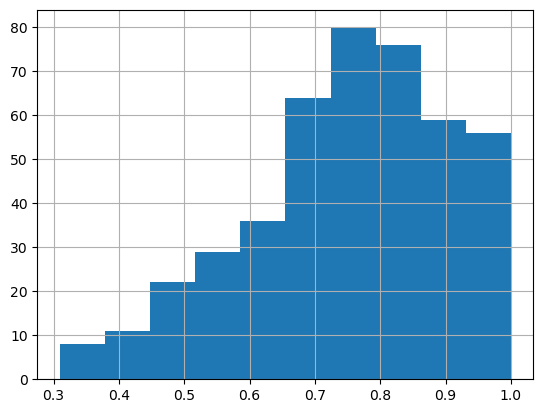

In [39]:
X = df_mut_express_crispr[all_features]
y = df_mut_express_crispr[target_name]

_ = y.hist()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder

categorical_preprocessors = [
    ("drop", "drop"),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    (
        "one_hot",
        OneHotEncoder(handle_unknown="ignore", max_categories=20, sparse_output=False),
    ),
    ("target", TargetEncoder(target_type="continuous")),
]

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

n_cv_folds = 3
max_iter = 20
results = []


def evaluate_model_and_store(name, pipe):
    result = cross_validate(
        pipe,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=n_cv_folds,
        return_train_score=True,
    )
    rmse_test_score = -result["test_score"]
    rmse_train_score = -result["train_score"]
    results.append(
        {
            "preprocessor": name,
            "rmse_test_mean": rmse_test_score.mean(),
            "rmse_test_std": rmse_train_score.std(),
            "rmse_train_mean": rmse_train_score.mean(),
            "rmse_train_std": rmse_train_score.std(),
        }
    )


for name, categorical_preprocessor in categorical_preprocessors:
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            ("categorical", categorical_preprocessor, categorical_features),
        ]
    )
    pipe = make_pipeline(
        preprocessor, HistGradientBoostingRegressor(random_state=0, max_iter=max_iter)
    )
    evaluate_model_and_store(name, pipe)

In [ ]:
n_unique_categories = df_mut_express_crispr[categorical_features].nunique().sort_values(ascending=False)
n_unique_categories

In [ ]:
high_cardinality_features = n_unique_categories[n_unique_categories > 255].index
low_cardinality_features = n_unique_categories[n_unique_categories <= 255].index
mixed_encoded_preprocessor = ColumnTransformer(
    [
        ("numerical", "passthrough", numerical_features),
        (
            "high_cardinality",
            TargetEncoder(target_type="continuous"),
            high_cardinality_features,
        ),
        (
            "low_cardinality",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            low_cardinality_features,
        ),
    ],
    verbose_feature_names_out=False,
)

# The output of the of the preprocessor must be set to pandas so the
# gradient boosting model can detect the low cardinality features.
mixed_encoded_preprocessor.set_output(transform="pandas")
mixed_pipe = make_pipeline(
    mixed_encoded_preprocessor,
    HistGradientBoostingRegressor(
        random_state=0, max_iter=max_iter, categorical_features=low_cardinality_features
    ),
)
mixed_pipe

In [ ]:
evaluate_model_and_store("mixed_target", mixed_pipe)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = (
    pd.DataFrame(results).set_index("preprocessor").sort_values("rmse_test_mean")
)

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 8), sharey=True, constrained_layout=True
)
xticks = range(len(results_df))
name_to_color = dict(
    zip((r["preprocessor"] for r in results), ["C0", "C1", "C2", "C3", "C4"])
)

for subset, ax in zip(["test", "train"], [ax1, ax2]):
    mean, std = f"rmse_{subset}_mean", f"rmse_{subset}_std"
    data = results_df[[mean, std]].sort_values(mean)
    ax.bar(
        x=xticks,
        height=data[mean],
        yerr=data[std],
        width=0.9,
        color=[name_to_color[name] for name in data.index],
    )
    ax.set(
        title=f"RMSE ({subset.title()})",
        xlabel="Encoding Scheme",
        xticks=xticks,
        xticklabels=data.index,
    )

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_pipeline(cat_feat, num_feat, n_components):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('target_encode', TargetEncoder()),  # Apply Target Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),      # First preprocess the data
        ('pca', PCA(n_components=n_components))                       # Then apply PCA
    ])
    
    return pipeline

def plot_pca_2d(X_transformed, target, target_labels, filename='pca_plot.png'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter)
    plt.title('PCA Plot with 2 Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # Save the plot as a PNG file
    plt.savefig(filename, format='png', dpi=300)
    
    # Show the plot
    plt.show()

In [ ]:
New_400_pipe = create_pipeline(categorical_features, numerical_features, n_components=400)

In [ ]:
X_transformed = New_400_pipe.fit_transform(
    df_mut_express_crispr.drop(
        columns=['Cell name','Depmap ID','AUC, DEG-35','response','response as number']), 
    df_mut_express_crispr['AUC, DEG-35 sigfig 4'])

In [ ]:
# Plot the PCA result
plot_pca_2d(X_transformed, df_mut_express_crispr['AUC, DEG-35 sigfig 4'], target_labels=None, filename='400pca_plot.png')

In [49]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

def create_pipeline(cat_feat, num_feat):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('target_encode', OneHotEncoder(sparse_output=False)),  # Apply Target Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)      # First preprocess the data
    ])
    return pipeline


In [43]:
Test_pipe = create_pipeline(categorical_features, numerical_features)

In [44]:
# Split the data into features and target
X = df_mut_express_crispr.drop(columns=['Cell name','Depmap ID','AUC, DEG-35','AUC, DEG-35 sigfig 4','response','response as number'])
y = df_mut_express_crispr['response']  # Target column

In [45]:
X_test_transformed = Test_pipe.fit_transform(X,y)

In [58]:
smote_enn = SMOTEENN(sampling_strategy=0.25, random_state=34)

X_resampled, y_resampled = smote_enn.fit_resample(X_test_transformed, y)

In [59]:
import numpy as np
from collections import Counter

# Check the distribution of the target classes
print(f'Original dataset class distribution: {Counter(y)}')
print(f'Resampled dataset class distribution: {Counter(y_resampled)}')


Original dataset class distribution: Counter({'insensitive': 369, 'sensitive': 72})
Resampled dataset class distribution: Counter({'sensitive': 52, 'insensitive': 21})


In [60]:
y_val = df_mut_express_crispr['response'].values

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_test_transformed, y_val, test_size=0.2, random_state=42)

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(400, 300, 200), max_iter=1000, random_state=34)

# Define the BernoulliRBM (feature extractor)
rbm = BernoulliRBM(n_components=400, learning_rate=0.001, n_iter=100, random_state=34)

# Update the pipeline for classification
model_pipeline = Pipeline(steps=[
    ('rbm', rbm),                      # BernoulliRBM feature extraction
    ('mlp', mlp)                       # MLP Classifier
])

# Train the pipeline on classification labels (discrete y values)
model_pipeline.fit(X_train, y_train)

# Predict and evaluate using classification metrics
y_pred = model_pipeline.predict(X_test)

# Evaluate performance using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # For imbalanced data, weighted F1 is better

print(f"Accuracy with MLP: {accuracy}")
print(f"F1 Score with MLP: {f1}")


Accuracy with MLP: 0.7303370786516854
F1 Score with MLP: 0.7242784754351179


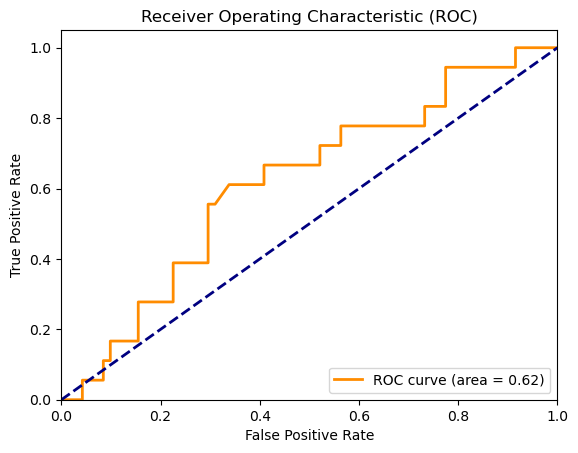

In [66]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert 'sensitive' and 'insensitive' to binary (1 for sensitive, 0 for insensitive)
y_test_binary = np.where(y_test == 'sensitive', 1, 0)
y_pred_binary = np.where(y_pred == 'sensitive', 1, 0)

# Get the predicted probabilities
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Predicted probability of the positive class (1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [70]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

def create_pipeline_umap(cat_feat, num_feat, n_components):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('target_encode', OneHotEncoder(sparse_output=False)),  # Apply One Hot Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline with UMAP instead of PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),      # First preprocess the data
        ('umap', umap.UMAP(n_components=n_components))  # Then apply UMAP
    ])
    
    return pipeline


In [71]:
umap_pipe = create_pipeline_umap(categorical_features, numerical_features, n_components=20)

In [73]:
from sklearn.preprocessing import LabelEncoder

# Convert y labels ('insensitive', 'sensitive') to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now fit the pipeline with the encoded labels
X_umap_transformed = umap_pipe.fit_transform(X, y_encoded)


In [74]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_umap_transformed, y_encoded, test_size=0.2, random_state=34)

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(400, 300, 200), max_iter=1000, random_state=34)

# Define the BernoulliRBM (feature extractor)
rbm = BernoulliRBM(n_components=400, learning_rate=0.001, n_iter=100, random_state=34)

# Update the pipeline for classification
model_pipeline = Pipeline(steps=[
    ('rbm', rbm),                      # BernoulliRBM feature extraction
    ('mlp', mlp)                       # MLP Classifier
])

# Train the pipeline on classification labels (discrete y values)
model_pipeline.fit(X_train, y_train)

# Predict and evaluate using classification metrics
y_pred = model_pipeline.predict(X_test)

# Evaluate performance using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # For imbalanced data, weighted F1 is better

print(f"Accuracy with MLP: {accuracy}")
print(f"F1 Score with MLP: {f1}")


Accuracy with MLP: 0.8539325842696629
F1 Score with MLP: 0.7866530473272046


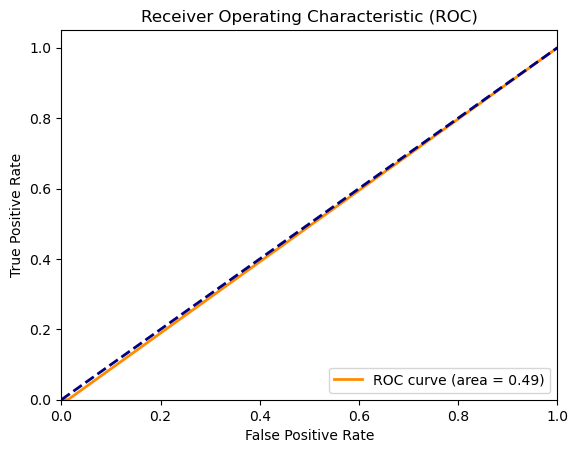

In [77]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (1)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [83]:
from sklearn.calibration import CalibratedClassifierCV

mlp_calibrated = CalibratedClassifierCV(mlp, method='sigmoid', cv=5)
mlp_calibrated.fit(X_train, y_train)
y_prob_calibrated = mlp_calibrated.predict_proba(X_test)[:, 1]

# Then calculate ROC AUC and plot ROC curve again


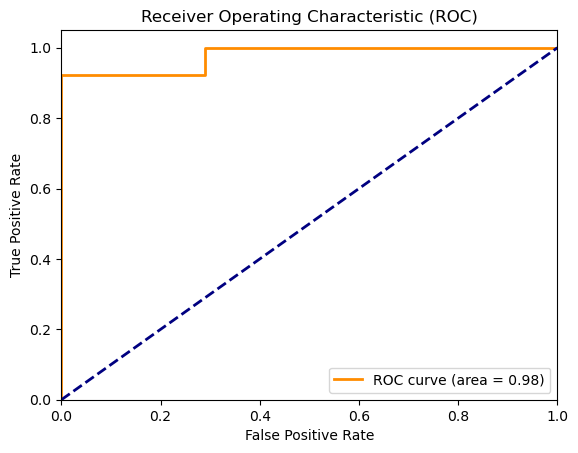

In [84]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_calibrated)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.s

In [86]:
import pandas as pd

# Create a DataFrame with true labels and predicted probabilities
comparison_df = pd.DataFrame({'True Label': y_test, 'Predicted Probability': y_prob_calibrated})

# Display the first few rows
print(comparison_df.head())


   True Label  Predicted Probability
0           0               0.028449
1           0               0.027953
2           0               0.028192
3           0               0.028514
4           0               0.027834


In [87]:
# Use a threshold of 0.5 to convert probabilities to class predictions
y_pred_calibrated = (y_prob_calibrated >= 0.5).astype(int)

# Compare the predictions with the true labels
comparison_df['Predicted Class'] = y_pred_calibrated

# Display the first few rows
print(comparison_df.head())


   True Label  Predicted Probability  Predicted Class
0           0               0.028449                0
1           0               0.027953                0
2           0               0.028192                0
3           0               0.028514                0
4           0               0.027834                0


In [88]:
comparison_df.to_excel('classifier prediction probabilites.xlsx')

In [91]:
# Evaluate performance using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred_calibrated)
f1 = f1_score(y_test, y_pred_calibrated, average='weighted')  # For imbalanced data, weighted F1 is better

print(f"Accuracy with MLP: {accuracy}")
print(f"F1 Score with MLP: {f1}")


Accuracy with MLP: 0.9887640449438202
F1 Score with MLP: 0.9885760446500699


C:\Users\Mark Leon-Duque\AppData\Local\Temp\ipykernel_13400\24735385.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob_calibrated[y_test == 0], label='Class 0 (Insensitive)', shade=True)
C:\Users\Mark Leon-Duque\AppData\Local\Temp\ipykernel_13400\24735385.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob_calibrated[y_test == 1], label='Class 1 (Sensitive)', shade=True)


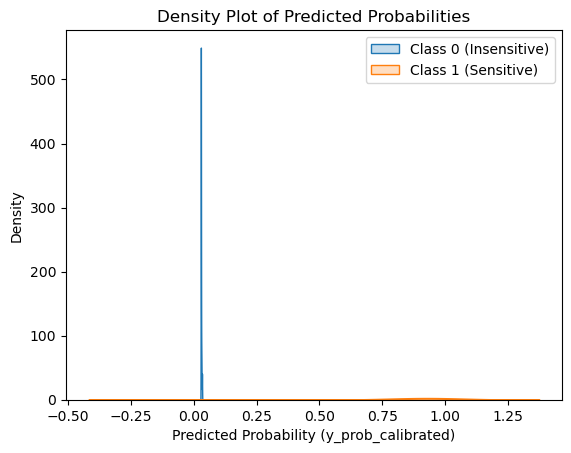

In [90]:
import seaborn as sns

# Plot the distribution of probabilities for each class (0 and 1)
sns.kdeplot(y_prob_calibrated[y_test == 0], label='Class 0 (Insensitive)', shade=True)
sns.kdeplot(y_prob_calibrated[y_test == 1], label='Class 1 (Sensitive)', shade=True)
plt.title('Density Plot of Predicted Probabilities')
plt.xlabel('Predicted Probability (y_prob_calibrated)')
plt.ylabel('Density')
plt.legend()
plt.show()



In [92]:
X_labels = df_mut_express_crispr.drop(columns=['AUC, DEG-35','AUC, DEG-35 sigfig 4','response as number'])

In [94]:
# Create default column names
column_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Convert NumPy array to DataFrame
X_train_df = pd.DataFrame(X_train, columns=column_names)

# Inspect the DataFrame
print(X_train_df.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  10.183233   5.267213   7.196894  19.226151   8.692657   6.766847   
1   5.377782   5.860290   4.951125   9.037298   6.358944   4.393286   
2  10.721013   5.127210   6.839951  18.583090   8.670804   6.747030   
3  10.533463   5.346735   7.090028  19.840332   8.958945   6.929862   
4  10.457695   5.227170   6.938676  18.705597   8.543535   6.728613   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   1.303070   8.154502   0.220283   3.353172    9.084681    3.517384   
1   2.945062   5.919741   4.229797   3.470194    8.697474    6.303613   
2   2.239455   7.986916   0.010822   3.740823    8.840437    3.499541   
3   1.330746   8.786178   0.042560   3.065481    8.634142    3.333938   
4   2.080674   7.881631   0.023625   3.771622    9.116755    3.481941   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0    5.113520    2.038911    4.955293    4.459445    1.15

In [95]:
df_SomaticMT = pd.read_csv('24Q2 depmap data/OmicsSomaticMutations.csv', low_memory=False)



In [96]:
df_SomaticMT = df_SomaticMT.rename(columns={'ModelID': 'Depmap ID'})

MT_gene_avg_auc = df_SomaticMT.groupby('HugoSymbol').agg({
    'Depmap ID': lambda x: ', '.join(map(str, x))
}).reset_index()

In [97]:
MT_gene_avg_auc.head()

,HugoSymbol,Depmap ID
0,A1BG,"ACH-000986, ACH-000985, ACH-000865, ACH-000847..."
1,A1CF,"ACH-000817, ACH-002996, ACH-000691, ACH-000612..."
2,A2M,"ACH-000662, ACH-002996, ACH-000448, ACH-000574..."
3,A2ML1,"ACH-000852, ACH-000956, ACH-000954, ACH-000880..."
4,A2MP1,ACH-001450


In [98]:
MT_gene_avg_auc = MT_gene_avg_auc.rename(columns={'HugoSymbol': 'Gene'})

In [99]:
MT_gene_avg_auc['Gene'] = MT_gene_avg_auc['Gene'] + "_mutational status"
MT_gene_avg_auc.head()

,Gene,Depmap ID
0,A1BG_mutational status,"ACH-000986, ACH-000985, ACH-000865, ACH-000847..."
1,A1CF_mutational status,"ACH-000817, ACH-002996, ACH-000691, ACH-000612..."
2,A2M_mutational status,"ACH-000662, ACH-002996, ACH-000448, ACH-000574..."
3,A2ML1_mutational status,"ACH-000852, ACH-000956, ACH-000954, ACH-000880..."
4,A2MP1_mutational status,ACH-001450


In [100]:
categorical_features_2 = Omics_mut['Gene'].tolist()

In [102]:
list1 = categorical_features
list2 = categorical_features_2
# Check if the lists have the same unique elements
if set(list1) == set(list2):
    print("The lists contain the same unique elements.")


The lists contain the same unique elements.


In [103]:
df3 = MT_gene_avg_auc

In [104]:
# Split 'Depmap ID' column by commas and create a list of all IDs
all_ids = df3['Depmap ID'].str.split(',').sum()

# Strip any leading/trailing whitespace
all_ids = [id.strip() for id in all_ids]

# Get unique IDs
unique_ids = list(set(all_ids))

# Create a new dataframe with unique Depmap IDs
df_unique_ids = pd.DataFrame(unique_ids, columns=['Depmap ID'])

In [105]:
df_unique_ids.head()

,Depmap ID
0,ACH-000572
1,ACH-000806
2,ACH-000581
3,ACH-000046
4,ACH-001559


In [106]:
print(len(df_unique_ids))

1788


In [109]:
# Create a dictionary to hold the new columns
new_columns = {}

# For each gene in df2, create a corresponding column in the dictionary
for index, row in df3.iterrows():
    gene = row['Gene']
    mt_cells = set(row['Depmap ID'].split(', '))
    
    # Apply the check to each cell name in df1
    new_columns[gene] = df_unique_ids['Depmap ID'].apply(lambda x: True if x in mt_cells else False)

# Convert the dictionary into a DataFrame
new_df_2 = pd.DataFrame(new_columns)

# Concatenate new_df to df1 (along columns)
df4 = pd.concat([df_unique_ids, new_df_2], axis=1)


In [110]:
df4.head()

,Depmap ID,A1BG_mutational status,A1CF_mutational status,A2M_mutational status,A2ML1_mutational status,A2MP1_mutational status,A3GALT2_mutational status,A4GALT_mutational status,A4GNT_mutational status,AAAS_mutational status,...,ZWILCH_mutational status,ZWINT_mutational status,ZXDA_mutational status,ZXDB_mutational status,ZXDC_mutational status,ZYG11A_mutational status,ZYG11B_mutational status,ZYX_mutational status,ZZEF1_mutational status,ZZZ3_mutational status
0,ACH-000572,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,ACH-000806,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ACH-000581,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,ACH-000046,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,ACH-001559,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
Omics_EPCG_2 = pd.read_csv('24Q2 depmap data/OmicsExpressionProteinCodingGenesTPMLogp1.csv')
Omics_EPCG_2 = Omics_EPCG_2.rename(columns={'Unnamed: 0': 'Depmap ID'})


In [113]:
Omics_2 = Omics_EPCG_2.transpose()
Omics_2 = Omics_2.reset_index()


row_index = 0
# Set the new header
new_header = Omics_2.iloc[row_index]  # Take the row to be used as header
df = Omics_2[1:]  # Remove the header row from the data
df.columns = new_header  # Set new header

# Reset index if desired
df.reset_index(drop=True, inplace=True)
df.head()

,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105),4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102),0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813),7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147),2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732),4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [114]:
df['Depmap ID'] = df['Depmap ID'] + "_Expression"

df.head()


C:\Users\Mark Leon-Duque\AppData\Local\Temp\ipykernel_13400\389830678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depmap ID'] = df['Depmap ID'] + "_Expression"


,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105)_Expression,4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102)_Expression,0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813)_Expression,7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147)_Expression,2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732)_Expression,4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [115]:
expression_features_2 = df['Depmap ID'].tolist()

In [116]:
list1 = expression_features
list2 = expression_features_2
# Check if the lists have the same unique elements
if set(list1) == set(list2):
    print("The lists contain the same unique elements.")

The lists contain the same unique elements.


In [117]:
Omics_EPCG_2.columns = ['Depmap ID' if col == 'Depmap ID' else f'{col}_Expression' for col in Omics_EPCG_2.columns]

In [118]:
Omics_EPCG_2.head()

,Depmap ID,TSPAN6 (7105)_Expression,TNMD (64102)_Expression,DPM1 (8813)_Expression,SCYL3 (57147)_Expression,C1orf112 (55732)_Expression,FGR (2268)_Expression,CFH (3075)_Expression,FUCA2 (2519)_Expression,GCLC (2729)_Expression,...,H3C2 (8358)_Expression,H3C3 (8352)_Expression,AC098582.1 (8916)_Expression,DUS4L-BCAP29 (115253422)_Expression,C8orf44-SGK3 (100533105)_Expression,ELOA3B (728929)_Expression,NPBWR1 (2831)_Expression,ELOA3D (100506888)_Expression,ELOA3 (162699)_Expression,CDR1 (1038)_Expression
0,ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
4,ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [119]:
from sklearn.impute import SimpleImputer

df = Omics_EPCG_2

# Assuming df is your original DataFrame
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to all columns except the first
imputed_data = imputer.fit_transform(df.iloc[:, 1:])

# Convert the imputed NumPy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns[1:], index=df.index)

# Add the first column back to the imputed DataFrame
final_df_2 = pd.concat([df.iloc[:, [0]], imputed_df], axis=1)

In [120]:
df_mut_express_2 = pd.merge(df4, final_df_2, on = 'Depmap ID', how = 'inner')

In [121]:
df_mut_express_2.head()

,Depmap ID,A1BG_mutational status,A1CF_mutational status,A2M_mutational status,A2ML1_mutational status,A2MP1_mutational status,A3GALT2_mutational status,A4GALT_mutational status,A4GNT_mutational status,AAAS_mutational status,...,H3C2 (8358)_Expression,H3C3 (8352)_Expression,AC098582.1 (8916)_Expression,DUS4L-BCAP29 (115253422)_Expression,C8orf44-SGK3 (100533105)_Expression,ELOA3B (728929)_Expression,NPBWR1 (2831)_Expression,ELOA3D (100506888)_Expression,ELOA3 (162699)_Expression,CDR1 (1038)_Expression
0,ACH-000572,False,False,True,False,False,False,False,False,False,...,0.584963,1.090853,0.378512,4.034744,0.378512,0.000000,0.000000,0.000000,0.000000,0.028569
1,ACH-000806,False,False,True,False,False,False,False,False,False,...,1.691534,2.456806,0.879706,2.912650,0.201634,0.000000,0.000000,0.000000,0.000000,0.000000
2,ACH-000581,False,False,False,False,False,False,False,False,False,...,1.014355,1.201634,0.150560,1.859970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ACH-000046,False,False,False,False,False,False,False,False,False,...,1.400538,0.516015,0.163499,3.104337,0.124328,0.028569,0.150560,0.028569,0.028569,0.000000
4,ACH-001559,False,False,False,False,False,True,False,False,False,...,0.782409,1.169925,0.594549,2.189034,0.505891,0.000000,0.014355,0.000000,0.000000,0.014355


In [122]:
print(len(df_mut_express_2))

1446


In [123]:
Crispr_gene_2 = pd.read_csv('24Q2 depmap data/CRISPRGeneDependency.csv')
Crispr_gene_2 = Crispr_gene_2.rename(columns = {'Unnamed: 0':'Depmap ID'})
Crispr_gene_2.columns = ['Depmap ID' if col == 'Depmap ID' else f'{col}_Crispr' for col in Crispr_gene_2.columns]
Crispr_gene_2.head()

,Depmap ID,A1BG (1)_Crispr,A1CF (29974)_Crispr,A2M (2)_Crispr,A2ML1 (144568)_Crispr,A3GALT2 (127550)_Crispr,A4GALT (53947)_Crispr,A4GNT (51146)_Crispr,AAAS (8086)_Crispr,AACS (65985)_Crispr,...,ZWILCH (55055)_Crispr,ZWINT (11130)_Crispr,ZXDA (7789)_Crispr,ZXDB (158586)_Crispr,ZXDC (79364)_Crispr,ZYG11A (440590)_Crispr,ZYG11B (79699)_Crispr,ZYX (7791)_Crispr,ZZEF1 (23140)_Crispr,ZZZ3 (26009)_Crispr
0,ACH-000001,0.071292,0.017673,0.019827,0.073156,0.035004,0.004561,0.047217,0.038751,0.004073,...,0.065708,0.010607,0.004537,0.002779,0.004899,0.139069,0.013865,0.015373,0.008694,0.348688
1,ACH-000004,0.021380,0.044764,0.067123,0.027426,0.035131,0.083807,0.002488,0.030512,0.003897,...,0.112009,0.343672,0.003412,0.012201,0.009104,0.009328,0.254528,0.009315,0.002205,0.048001
2,ACH-000005,0.057855,0.016946,0.006704,0.011017,0.086535,0.114027,0.008054,0.026290,0.050606,...,0.174211,0.214611,0.030635,0.039771,0.022880,0.069180,0.036604,0.031404,0.016496,0.057902
3,ACH-000007,0.023561,0.045373,0.008245,0.005488,0.016603,0.016316,0.013636,0.064170,0.070760,...,0.225075,0.327587,0.015720,0.002066,0.009115,0.023196,0.320987,0.015558,0.186942,0.408645
4,ACH-000009,0.040918,0.120197,0.017109,0.013523,0.019987,0.088635,0.027205,0.074297,0.021527,...,0.255527,0.136172,0.039931,0.003819,0.063319,0.067207,0.673399,0.010885,0.041689,0.258740


In [124]:
Cr2 = Crispr_gene_2.transpose()
Cr2 = Cr2.reset_index()


row_index = 0
# Set the new header
new_header = Cr2.iloc[row_index]  # Take the row to be used as header
df_c2 = Cr2[1:]  # Remove the header row from the data
df_c2.columns = new_header  # Set new header

# Reset index if desired
df_c2.reset_index(drop=True, inplace=True)
df_c2.head()

,Depmap ID,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,...,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926,ACH-002928,ACH-003012
0,A1BG (1)_Crispr,0.071292,0.02138,0.057855,0.023561,0.040918,0.014886,0.08201,0.016525,0.042368,...,0.084359,0.066415,0.019838,0.045808,0.046582,0.036581,0.088764,0.047888,0.09786,0.056716
1,A1CF (29974)_Crispr,0.017673,0.044764,0.016946,0.045373,0.120197,0.03175,0.019737,0.095386,0.080011,...,0.067568,0.03466,0.067346,0.059521,0.07161,0.01812,0.029155,0.04457,0.038473,0.020509
2,A2M (2)_Crispr,0.019827,0.067123,0.006704,0.008245,0.017109,0.010665,0.016878,0.028142,0.008378,...,0.021138,0.026145,0.005472,0.019784,0.020361,0.029995,0.009108,0.009745,0.056911,0.006128
3,A2ML1 (144568)_Crispr,0.073156,0.027426,0.011017,0.005488,0.013523,0.00219,0.010736,0.015713,0.007513,...,0.018256,0.020559,0.013849,0.025397,0.020562,0.000655,0.031287,0.005395,0.031351,0.002501
4,A3GALT2 (127550)_Crispr,0.035004,0.035131,0.086535,0.016603,0.019987,0.063731,0.010613,0.077253,0.022299,...,0.205097,0.0998,0.212608,0.129895,0.099042,0.171189,0.058733,0.078431,0.117119,0.049765


In [125]:
crispr_features_2 = df_c2['Depmap ID'].tolist()

In [126]:
list1 = crispr_features
list2 = crispr_features_2
# Check if the lists have the same unique elements
if set(list1) == set(list2):
    print("The lists contain the same unique elements.")

The lists contain the same unique elements.


In [127]:
from sklearn.impute import SimpleImputer

Crispr_gene_imputed = Crispr_gene_2.iloc[:, 1:]

imputer = SimpleImputer(strategy='mean')

# Apply the imputer to all columns except the first
Crispr_imputed_data = imputer.fit_transform(Crispr_gene_imputed)

# Convert the NumPy array back to a DataFrame, keeping the original column names
Crispr_gene_imputed_df = pd.DataFrame(Crispr_imputed_data, columns=Crispr_gene_2.columns[1:], index=Crispr_gene_2.index)

# Add the first column back to the imputed DataFrame
Crispr_gene_imputed_2 = pd.concat([Crispr_gene_2.iloc[:, [0]], Crispr_gene_imputed_df], axis=1)

In [128]:
print(len(Crispr_gene_imputed_2))

1150


In [129]:
df_mut_express_crispr_2 = pd.merge(df_mut_express_2, Crispr_gene_imputed_2, on = 'Depmap ID', how = 'inner')

In [130]:
print(len(df_mut_express_crispr_2))

1066


In [131]:
df_mut_express_crispr_2.to_csv('all 24Q2 aggregated data for umap_ALLImputed.csv')

In [133]:
df_mut_express_crispr_2_labels['Depmap ID'] = df_mut_express_crispr_2['Depmap ID']
df_mut_express_crispr_2_labels.head()

C:\Users\Mark Leon-Duque\AppData\Local\Temp\ipykernel_13400\3594506637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mut_express_crispr_2_labels['Depmap ID'] = df_mut_express_crispr_2['Depmap ID']


0    ACH-000581
1    ACH-001559
2    ACH-000579
3    ACH-001354
4    ACH-000585
Name: Depmap ID, dtype: object

In [134]:
# set up test data for preprocessing
X_new = df_mut_express_crispr_2.drop(columns=['Depmap ID'])

In [135]:
# Now fit the pipeline with the encoded labels
X_new_umap_transformed = umap_pipe.fit_transform(X_new)

In [136]:
y_new_prob_calibrated = mlp_calibrated.predict_proba(X_new_umap_transformed)[:, 1]

In [140]:
# Create a DataFrame with true labels and predicted probabilities
new_comparison_df = pd.DataFrame({'Predicted Probability': y_new_prob_calibrated})

# Display the first few rows
print(comparison_df.head())

   Predicted Probability
0               0.927214
1               0.927213
2               0.927291
3               0.927227
4               0.927164


In [142]:
# Use a threshold of 0.5 to convert probabilities to class predictions
y_new_pred_calibrated = (y_new_prob_calibrated >= 0.5).astype(int)

# Compare the predictions with the true labels
new_comparison_df['Predicted Class'] = y_new_pred_calibrated

# Display the first few rows
print(new_comparison_df.head())

   Predicted Probability  Predicted Class
0               0.927214                1
1               0.927213                1
2               0.927291                1
3               0.927227                1
4               0.927164                1


In [143]:
new_comparison_df.to_excel('classifier prediction probabilites_v2.xlsx')

In [144]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(mlp_calibrated, X_train, y_train, cv=5)
print(cv_scores)


[1.         1.         0.97142857 0.98571429 0.98571429]


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (1)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to check feature correlations
sns.heatmap(df_mut_express_crispr[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
New_pipe_PCA2 = create_pipeline(categorical_features, numerical_features, n_components=3)

X_transformed_2 = New_pipe_PCA2.fit_transform(
    df_mut_express_crispr.drop(
        columns=['Cell name','Depmap ID','AUC, DEG-35','response','response as number']), 
    df_mut_express_crispr['AUC, DEG-35 sigfig 4'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_3d(X_transformed, target, filename='3D_pca_plot.png'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title('3D PCA Plot')
    # Save the plot as a PNG file
    plt.savefig(filename, format='png', dpi=300)
    plt.show()

# Use the transformed data with 3 components
plot_pca_3d(X_transformed_2, df_mut_express_crispr['AUC, DEG-35 sigfig 4'])


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap

def create_pipeline_umap(cat_feat, num_feat, n_components):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('target_encode', TargetEncoder()),  # Apply Target Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline with UMAP instead of PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),      # First preprocess the data
        ('umap', umap.UMAP(n_components=n_components))  # Then apply UMAP
    ])
    
    return pipeline


In [ ]:
New_400_pipe_umap = create_pipeline_umap(categorical_features, numerical_features, n_components=400)

X_transformed_umap = New_400_pipe_umap.fit_transform(
    df_mut_express_crispr.drop(
        columns=['Cell name','Depmap ID','AUC, DEG-35','response','response as number']), 
    df_mut_express_crispr['AUC, DEG-35 sigfig 4'])

In [ ]:
def plot_umap_2d(X_transformed, target, target_labels=None, filename='umap_plot.png'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter)
    plt.title('UMAP Plot with 2 Components')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    
    # Save the plot as a PNG file
    plt.savefig(filename, format='png', dpi=300)
    
    # Show the plot
    plt.show()


In [ ]:
# Assuming 'X_transformed' is the UMAP-transformed data
plot_umap_2d(X_transformed_umap, df_mut_express_crispr['AUC, DEG-35 sigfig 4'], target_labels=None, filename='400_umap_plot.png')


In [ ]:
New_pipe_umap_3d = create_pipeline_umap(categorical_features, numerical_features, n_components=3)

X_transformed_umap_3d = New_pipe_umap_3d.fit_transform(
    df_mut_express_crispr.drop(
        columns=['Cell name','Depmap ID','AUC, DEG-35','response','response as number']), 
    df_mut_express_crispr['AUC, DEG-35 sigfig 4'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_umap_3d(X_transformed, target, target_labels=None, filename='umap_3d_plot.png'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], 
                         c=target, cmap='viridis', s=50)
    
    # Adding labels and title
    ax.set_title('UMAP Plot with 3 Components')
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')

    # Add color bar
    plt.colorbar(scatter)
    
    # Save the plot as a PNG file
    plt.savefig(filename, format='png', dpi=300)
    
    # Show the plot
    plt.show()


In [ ]:
plot_umap_3d(X_transformed_umap_3d, df_mut_express_crispr['AUC, DEG-35 sigfig 4'], target_labels=None)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_pipeline_OneHot_PCA(cat_feat, num_feat, n_components):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('One_Hot_encode', OneHotEncoder()),  # Apply One Hot Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),      # First preprocess the data
        ('pca', PCA(n_components=n_components))                       # Then apply PCA
    ])
    
    return pipeline


In [ ]:
def create_pipeline_transform(cat_feat, num_feat):
    # Define transformers
    categorical_transformer = Pipeline(steps=[
        ('target_encode', TargetEncoder()),  # Apply Target Encoding
        ('scaler', StandardScaler())         # Scale the encoded features
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())         # Scale numerical features
    ])
    
    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_feat),
            ('num', numerical_transformer, num_feat)
        ]
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)      # First preprocess the data
        
    ])
    
    return pipeline

In [ ]:
X_pipe = create_pipeline_transform(categorical_features, numerical_features)

X_trans = X_pipe.fit_transform(
    df_mut_express_crispr.drop(
        columns=['Cell name','Depmap ID','AUC, DEG-35','response','response as number']), 
    df_mut_express_crispr['AUC, DEG-35 sigfig 4'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' is your input data (e.g., after scaling)
pca = PCA()

# Fit PCA on the data
pca.fit(X_trans)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig(fname = 'Cumulative explained variance PCA.png', format='png', dpi=300)
plt.show()


In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming `X_transformed` is your UMAP or PCA reduced data


In [ ]:
# Create a pipeline with BernoulliRBM and Logistic Regression
rbm = BernoulliRBM(n_components=256, learning_rate=0.001, n_iter=100, random_state=42)
logistic = LogisticRegression(max_iter=1000)

model_pipeline = Pipeline(steps=[
    ('rbm', rbm),                      # BernoulliRBM feature extraction
    ('logistic', logistic)              # Logistic Regression (or another model)
])


In [ ]:
# Assuming df_mut_express_crispr['AUC, DEG-35 sigfig 4'] is the target variable
y = df_mut_express_crispr['AUC, DEG-35 sigfig 4'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [ ]:
X_transformed_df = pd.DataFrame(X_transformed)

X_transformed_df.to_csv('X_400PCA_Transformed.csv')

In [ ]:
from sklearn.neural_network import MLPRegressor

# Replace LogisticRegression with a neural network (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(400, 300, 200), max_iter=1000, random_state=42, )
rbm = BernoulliRBM(n_components=400, learning_rate=0.001, n_iter=100, random_state=42)
# Update the pipeline
model_pipeline = Pipeline(steps=[
    ('rbm', rbm),                      # BernoulliRBM feature extraction
    ('mlp', mlp)                       # MLP Regressor
])

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with MLP: {mse}")


In [ ]:
import matplotlib.pyplot as plt

# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_pred_df = pd.DataFrame(y_pred, index=y_test_df.index, columns=['y_pred'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_pred_df], axis=1)
combined_df.columns = ['y_test', 'y_pred']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_pred'], color='red', label='y_pred', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_pred')
plt.legend()
plt.show()

In [ ]:
from imblearn.combine import SMOTENN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Split the data into features and target
X = df_mut_express_crispr.drop(columns=['Cell name', 'Depmap ID', 'AUC, DEG-35',
                                        'AUC, DEG-35 sigfig 4', 'response', 'response as number'])
y = df_mut_express_crispr['AUC, DEG-35']  # Target column

X_pipe = create_pipeline_transform(categorical_features, numerical_features)

# Step 1: Preprocess the data (e.g., scaling, encoding)

X_scaled = X_pipe.fit_transform(X,y)

# Step 2: Apply SMOTE (oversample minority class)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)





In [ ]:
import numpy as np
from collections import Counter

# Check the distribution of the target classes
print(f'Original dataset class distribution: {Counter(y)}')
print(f'Resampled dataset class distribution: {Counter(y_resampled)}')


In [ ]:
# Step 3: Apply PCA (optional, for dimensionality reduction)
pca = PCA(n_components=400)
X_pca = pca.fit_transform(X_resampled)

# Step 4: Train your model on the resampled and PCA-reduced data
# You can split it into training/testing sets first
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Replace LogisticRegression with a neural network (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(400, 300, 200), max_iter=1000, random_state=42, )
rbm = BernoulliRBM(n_components=400, learning_rate=0.001, n_iter=100, random_state=42)
# Update the pipeline
model_pipeline = Pipeline(steps=[
    ('rbm', rbm),                      # BernoulliRBM feature extraction
    ('mlp', mlp)                       # MLP Regressor
])

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with MLP: {mse}")

In [ ]:
import matplotlib.pyplot as plt

# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_pred_df = pd.DataFrame(y_pred, index=y_test_df.index, columns=['y_pred'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_pred_df], axis=1)
combined_df.columns = ['y_test', 'y_pred']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_pred'], color='red', label='y_pred', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_pred')
plt.legend()
plt.show()